## Depth-first search and Breadth-first search


Write a Depth-first search (DFS) implementation using Sage Graph representation
  * Write a recursive implementation of the depth-first search.
(See Handouts on Course Homepage for pseudocode)

In [17]:
def DFS_recursive(G, r):
    """
    Perform DFS from root r. Result is a dictionary mapping a vertex v to its predecessor in DFS tree (root is mapped to None).
    """
    prev = {}
    prev[r] = None
    DFS_recursive_call(G, r, prev)
    return prev

def DFS_recursive_call(G, v, prev):
    for u in G[v]:
        if u not in prev:
            prev[u] = v
            DFS_recursive_call(G, u, prev)
    pass

Example

In [18]:
G = Graph({0:[1,2,3], 4:[0,2], 6:[1,2,3,4,5]})

In [19]:
dfs_dict = DFS_recursive(G, 0)
dfs_dict

{0: None, 1: 0, 6: 1, 2: 6, 4: 2, 3: 6, 5: 6}

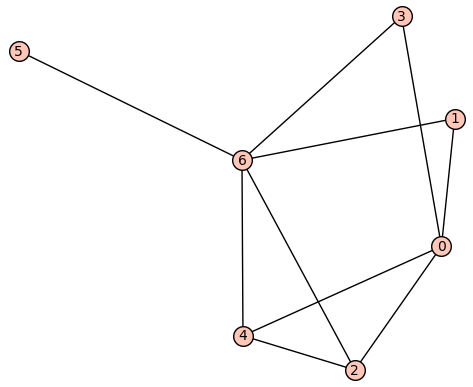

In [11]:
G.plot(edge_colors={'red': [(u, v) for (u, v) in dfs_dict.items() if v != None]})

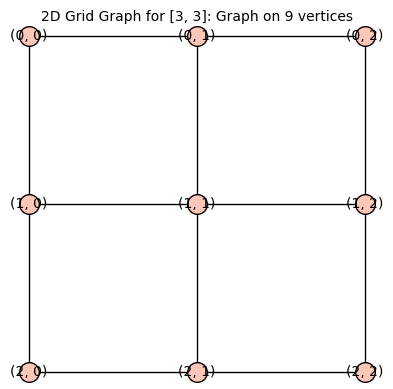

In [12]:
H = graphs.Grid2dGraph(3, 3)
H

In [13]:
DFS_recursive(H, (0, 0))

{(0, 0): None}

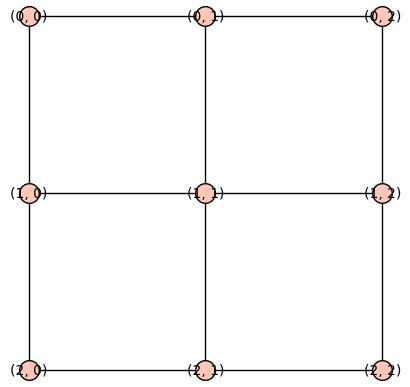

In [14]:
H.plot(edge_colors={'red': [(u, v) for (u, v) in DFS_recursive(H, (0, 0)).items() if v != None]})


### Dfs with start (discovery) time and end (finishing) time

In [23]:
def DFS_with_times_call(G, v, prev, start_times, end_times, time):
    start_times[v] = time
    time += 1
    for u in G[v]:
        if u not in prev:
            prev[u] = v
            time = DFS_with_times_call(G, u, prev, start_times, end_times, time)
    end_times[v] = time
    time += 1
    return time

def DFS_with_times(G, r):
    """
    Perform DFS from root r. Result is a triple of three dictionaries:
    - dictionary mapping a vertex v to its predecessor in DFS tree (root is mapped to None).
    - dictionary mapping a vertex to its start time
    - dictionary mapping a vertex to its end time
    """    
    start_times = {}
    end_times = {}
    prev = {}
    time = 1
    prev[r] = None
    DFS_with_times_call(G, r, prev, start_times, end_times, time)
    return prev, start_times, end_times


In [24]:
G = Graph({0:[1,2,3], 4:[0,2], 6:[1,2,3,4,5]})
(prev, disc, finish) = DFS_with_times(G, 0)
(prev, disc, finish)

({0: None, 1: 0, 6: 1, 2: 6, 4: 2, 3: 6, 5: 6},
 {0: 1, 1: 2, 6: 3, 2: 4, 4: 5, 3: 8, 5: 10},
 {4: 6, 2: 7, 3: 9, 5: 11, 6: 12, 1: 13, 0: 14})

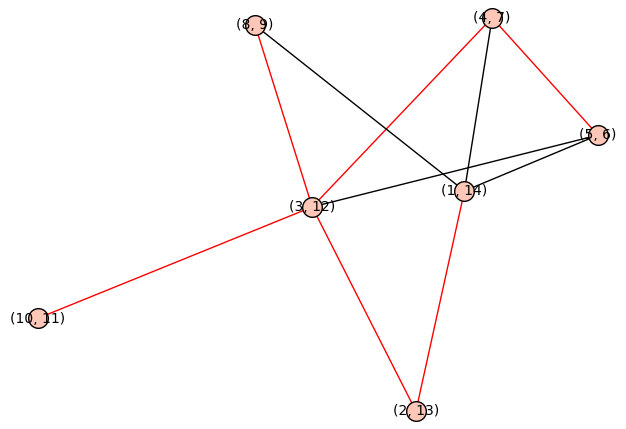

In [ ]:
G.relabel(dict([(v, (disc[v], finish[v])) for v in G.vertices(sort=False)]))
G.plot(edge_colors={'red': [((disc[u], finish[u]), (disc[v], finish[v])) for (u, v) in prev.items() if v != None]})

## BFS

Write a Breadth-first search (BFS) implementation using Sage Graph representation.

In [27]:
from collections import deque
def BFS_call(G, r, prev):
    Q = deque([r])
    while Q:
        v = Q.popleft()
        for u in G[v]:
            if u not in prev:
                prev[u] = v
                Q.append(u)

def BFS(G, r):
    """
    Perform BFS from root r. Result is a dictionary mapping a vertex v to its predecessor in BFS tree (root is mapped to None).
    """    
    prev = {}
    prev[r] = None
    BFS_call(G, r, prev)
    return prev

In [28]:
BFS(H, (0, 0))

{(0, 0): None,
 (0, 1): (0, 0),
 (1, 0): (0, 0),
 (0, 2): (0, 1),
 (1, 1): (0, 1),
 (2, 0): (1, 0),
 (1, 2): (0, 2),
 (2, 1): (1, 1),
 (2, 2): (1, 2)}

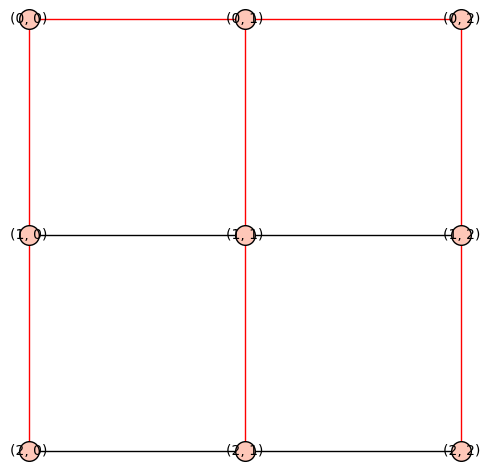

In [ ]:
H.plot(edge_colors={'red': [(u, v) for (u, v) in BFS(H, (0, 0)).items() if v != None]})

### Topological sorting

* Use DFS with discovery and finishing times to implement topological sorting of a DAG (directed acyclic) graph. Note:
  * You need to take into account direction of edges in graph traversal
  * You need to consider that the graph is a "forest"
  * Topological sorting is sorting ov vertices in descending finishing time
* Help professor Bumstead to dress himself in the correct order. Order of putting his garments is given by the digraph below 

In [31]:
T = DiGraph({'undershorts': ['shoes','pants'],'pants':['shoes','belt'],'belt':['jacket'],'shirt':['belt','tie'],'tie':['jacket'],
        'socks':['shoes'],'watch':[]})

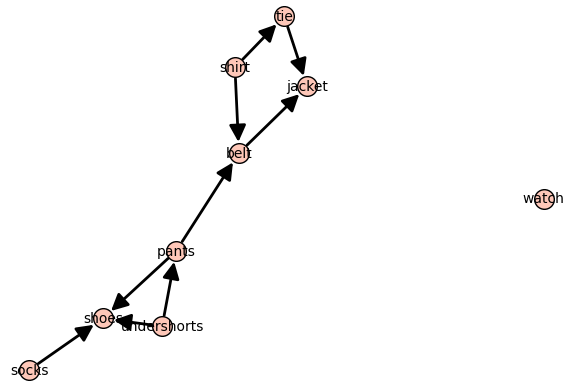

In [32]:
T.plot()

In [ ]:
def DFS_DiGraph_call(G, v, prev, start_times, end_times, time):
    start_times[v] = time
    time += 1
    for u in G.neighbors_out(v):
        if u not in prev:
            prev[u] = v
            time = DFS_DiGraph_call(G, u, prev, start_times, end_times, time)
    end_times[v] = time
    time += 1
    return time

def DFS_DiGraph(G):
    """
    Implement (recursive) DFS on a digraph to create a "forest of DFS trees" 
    
    Use G.neighbors_out(v) to get "out" neighbors of vertex v
    """
    start_times = {}
    end_times = {}
    prev = {}
    time = 1
    for v in G:
        if v not in prev:
            prev[v] = None
            time = DFS_DiGraph_call(G, v, prev, start_times, end_times, time)
    return prev, start_times, end_times

In [34]:
DFS_DiGraph(T)

({'shirt': None,
  'tie': 'shirt',
  'jacket': 'tie',
  'belt': 'shirt',
  'shoes': None,
  'socks': None,
  'undershorts': None,
  'pants': 'undershorts',
  'watch': None},
 {'shirt': 1,
  'tie': 2,
  'jacket': 3,
  'belt': 6,
  'shoes': 9,
  'socks': 11,
  'undershorts': 13,
  'pants': 14,
  'watch': 17},
 {'jacket': 4,
  'tie': 5,
  'belt': 7,
  'shirt': 8,
  'shoes': 10,
  'socks': 12,
  'pants': 15,
  'undershorts': 16,
  'watch': 18})

In [ ]:
def topological_sort(G):
    """
    Performs topological sort on a DAG (directed acyclic graph) G
    """
    for v in G:
        if G.out_degree(v) == 0:
            root = v
            break
    _, _, end_times = DFS_DiGraph(G)
    return sorted((G.vertices()), key=lambda v: end_times[v], reverse=True)

In [36]:
topological_sort(T)

['watch',
 'undershorts',
 'pants',
 'socks',
 'shoes',
 'shirt',
 'belt',
 'tie',
 'jacket']